In [310]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

In [5]:
IMSIZE = 384

# Process data

In [3]:
data = np.fromfile("/home/philip/RemoteFNAL/PanLee_v8_00_00_13/OutTest/viewV_May13.bin", dtype=np.float32)

In [9]:
ss = np.where(data==-1.22)[0] # Image seperator locations
print(np.shape(ss))

(3518,)


In [369]:
i=32
xMin = data[1+ss[i]]
zMin = data[2+ss[i]]   
points = data[3+ss[i]:ss[i+1]].reshape((-1,6))

x = ((points[:,0]-xMin)/0.3).astype(int)
z = ((points[:,1]-zMin)/0.3).astype(int)
Esto = points[:,2:]

frame = np.zeros((IMSIZE, IMSIZE, 4))
for x1, z1, Esto1 in zip(x, z, Esto):
    frame[x1,z1]=Esto1

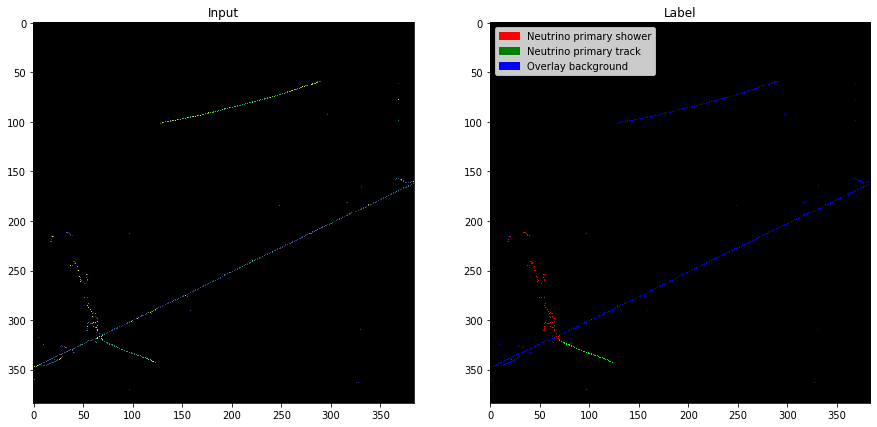

In [373]:
frame[frame<0.0]=0.0
frame[frame>1.0]=1.0
plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.title("Input")

a = 1500*frame[:,:,0]
a[a>1.0]=1.0;
masked_frame = np.ma.masked_where(a == 0.0, a)
cmap = matplotlib.cm.viridis  # Can be any colormap that you want after the cm
cmap.set_bad(color='black')
plt.imshow(masked_frame, cmap=cmap)
#plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Label")
plt.imshow(frame[:,:,1:])
red_patch = mpatches.Patch(color='red', label='Neutrino primary shower')
green_patch = mpatches.Patch(color='green', label='Neutrino primary track')
blue_patch = mpatches.Patch(color='blue', label='Overlay background')
plt.legend(handles=[red_patch, green_patch, blue_patch], loc = 'upper left')
#plt.savefig('croppedEvent0.png')
plt.show()

In [ ]:
def u_resnet(output_channels, depth):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44)')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)
    
    inputs = tf.keras.layers.Input(shape=[IMSIZE, IMSIZE, 1])
    x = resnet_layer(inputs=inputs)
    
    skips = [None]*5
    
    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    skips = reversed(skips[:-1])
    skips = []

    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    
    
    
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])
        print(x)

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module, output_channels, depth):
    def __init__(self):
        super(UNet, self).__init__()
        self.output_channels = output_channels
        self.
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))


def u_resnet(output_channels, depth):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44)')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)
    
    inputs = tf.keras.layers.Input(shape=[IMSIZE, IMSIZE, 1])
    x = resnet_layer(inputs=inputs)
    
    skips = [None]*5
    
    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    skips = reversed(skips[:-1])
    skips = []

    # Instantiate the stack of residual units
    for stack in range(5):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tf.keras.layers.add([x, y])
            x = tf.keras.layers.Activation('relu')(x)
        skips[stack] = x
        num_filters *= 2
    
    
    
    
    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])
        print(x)

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)
    return model